COMPUTER VISION (CE-632)
COURSE = DATA SCIENCE
SOURAV KUMAR KHAN
REG NO = 21-27-13

### IMPORTING THE LIBRARIES 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Importing the image

In [16]:
image = cv2.imread("bird.jpg")
 

In [3]:
print(image.shape)

(322, 420, 3)


In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Introducing the noise to an image

### 1. Salt and Pepper Noise

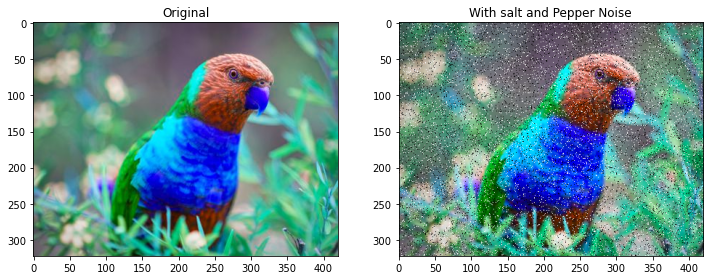

In [17]:
rows, column, channels = image.shape
p=0.1  #Lets say image has 10% noise (p is the probability)
import random

output_image = np.zeros(image.shape, np.uint8)
for i in range(rows):
    for j in range(column):
        r = random.random()
        if r< p/2:
            output_image[i][j] = [0,0,0]   #pepper (black) sprinkled
        elif r<p:
            output_image[i][j] = [255,255,255]   #salt (white) sprinkled
        else: 
            output_image[i][j] = image[i][j]
            
            
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Original")
ax[1].set_title("With salt and Pepper Noise")
ax[0].imshow(image)
ax[1].imshow(output_image)
        

### 2. Gaussian Noise 

In [19]:
rows, column, channels = image.shape
gaussian_noise = np.zeros(image.shape, np.uint8)
cv2.randn(gaussian_noise, 1, 200)  #mean value = 1 And std = 200
output_image2 = image + gaussian_noise

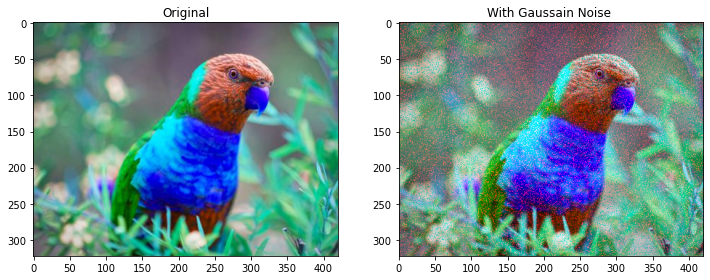

In [25]:
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Original")
ax[1].set_title("With Gaussain Noise ")
ax[0].imshow(image)
ax[1].imshow(output_image2)
        

## 3D CONVOULUTION - IMAGE FILTERING

### 1. Averaging

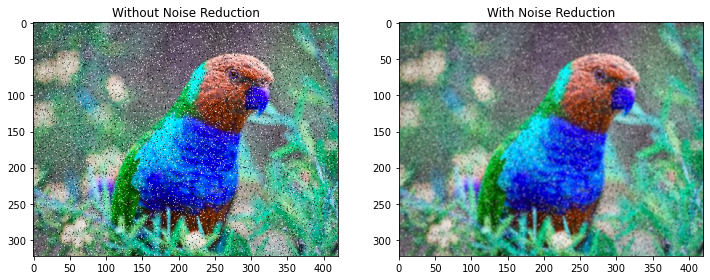

In [23]:
blur = cv2.blur(output_image , (3,3))
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Without Noise Reduction")
ax[1].set_title("With Noise Reduction")
ax[1].imshow(blur)
ax[0].imshow(output_image)
        

### 2. Kernel Bluring using Filter2D

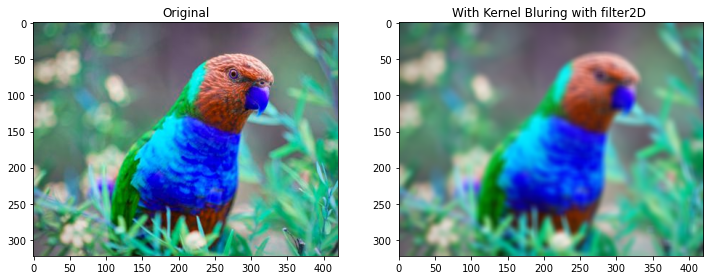

In [33]:
kernel = np.ones((9,9),np.float32)/81.0
output_image_Kernel = cv2.filter2D(image, -1, kernel)
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Original")
ax[1].set_title("With Kernel Bluring with filter2D ")
ax[0].imshow(image)
ax[1].imshow(output_image_Kernel)
        

### 3. Gaussian Blur

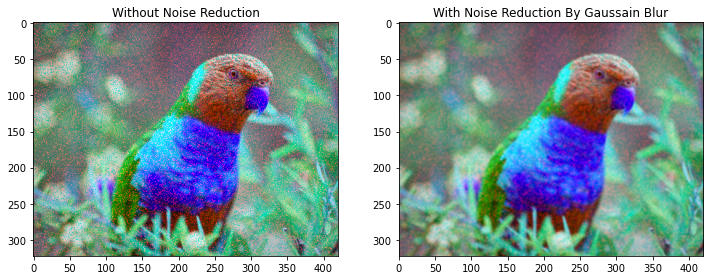

In [27]:
#Removing gaussain noise with Gaussina blur
Gaussain_Blur = cv2.GaussianBlur(output_image2, (3,3),3)
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Without Noise Reduction")
ax[1].set_title("With Noise Reduction By Gaussain Blur")
ax[0].imshow(output_image2)
ax[1].imshow(Gaussain_Blur)
        

### 4. Median Blur

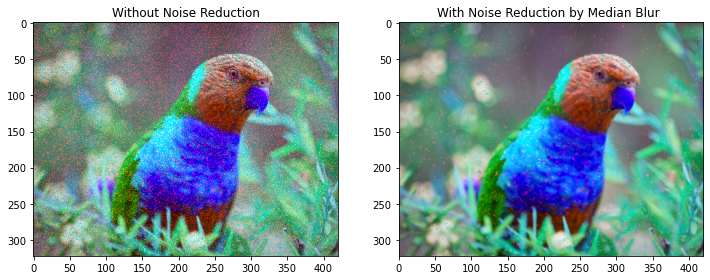

In [32]:
#This bluring effect is highly effective spqcially for salt and pepper noise in an image
Median_Blur = cv2.medianBlur(output_image2, 3)


from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Without Noise Reduction")
ax[1].set_title("With Noise Reduction by Median Blur ")
ax[0].imshow(output_image2)
ax[1].imshow(Median_Blur)     

### 5. Box Filter and blur function bluring

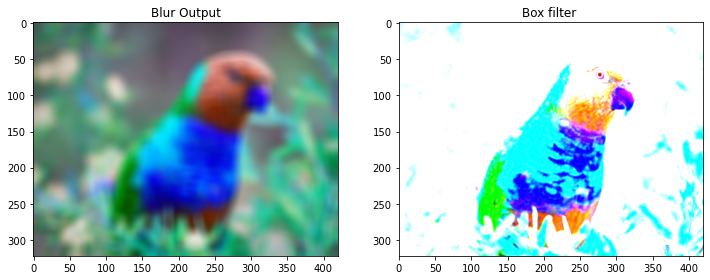

In [38]:
output_blur = cv2.blur(image, (15,15))
output_box = cv2.boxFilter(image, -1, (2,2), normalize = False)
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Blur Output")
ax[1].set_title("Box filter ")
ax[0].imshow(output_blur)
ax[1].imshow(output_box)
        

### Bilateral Filtering (Reduction of Noise + Preserving of edges)

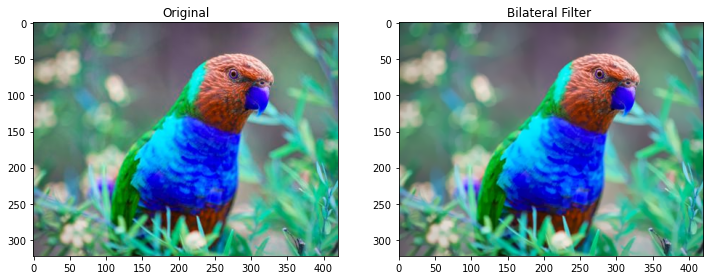

In [41]:
output_bil = cv2.bilateralFilter(image, 10,9,9)
from matplotlib.pyplot import subplots
fig,ax = subplots(1,2, figsize =(12,20))
ax[0].set_title("Original")
ax[1].set_title("Bilateral Filter ")
ax[0].imshow(image)
ax[1].imshow(output_bil)